# Railway Visual Inspection 

## Author: Spriha Ghosh

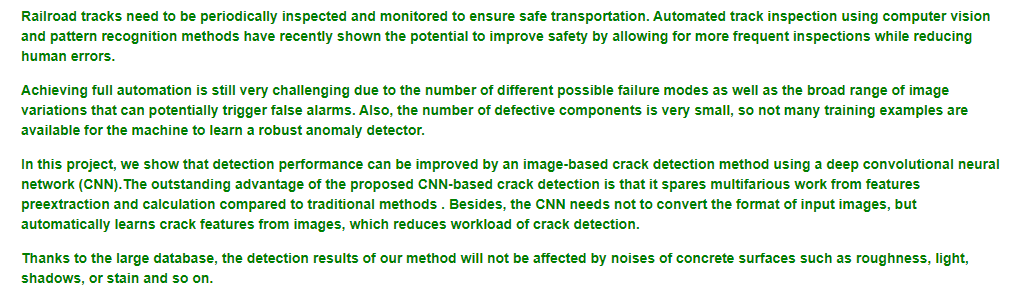

![alt](https://i.imgur.com/mW0PEwF.gif?noredirect)


##  Import required libraries and packages

In [2]:
import numpy as np           # linear algebra
import pandas as pd         # data processing
import seaborn as sns

import plotly.express as px
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import keras
from keras.preprocessing import image
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

# **Load Dataset**

In [3]:
#Get Positive & Negative Directories
defective_dir = Path('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Train/Defective')
nondefective_dir = Path('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Train/Non defective')


# **Checking Images Data**

In [6]:
#as directory is path object , use glob function to find
#certain patterns in the data like images having jpg extension
defective_dir.glob(r'*.jpg')

<generator object Path.glob at 0x7f2a72cd26d0>

In [7]:
#Defective Image Count
defective_images = len(list(defective_dir.glob(r'*.jpg')))
print("Number of Defective Images: ",defective_images)


Number of Defective Images:  134


In [8]:
#Non Defective Image Count
nondefective_images =len(list(nondefective_dir.glob(r'*.jpg')))
print("Number of No Defective Images: ",defective_images)

Number of No Defective Images:  134


# **Loading Image Data**

In [9]:
train=ImageDataGenerator(rescale=1/255,validation_split=0.05)       # Real Time Data Augmentation

In [10]:
##Training & Validation Dataset Creation*"""
img_height,img_width=128,128
batch_size=32


# **Visualize Data**

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt #alias for pyplot submodule
import matplotlib.image as mpimg #module for image manipulation
import cv2 #import SciPy library for image processing
import os #to deal with contents from the operating system

# Parameters for the graph; output images will be in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

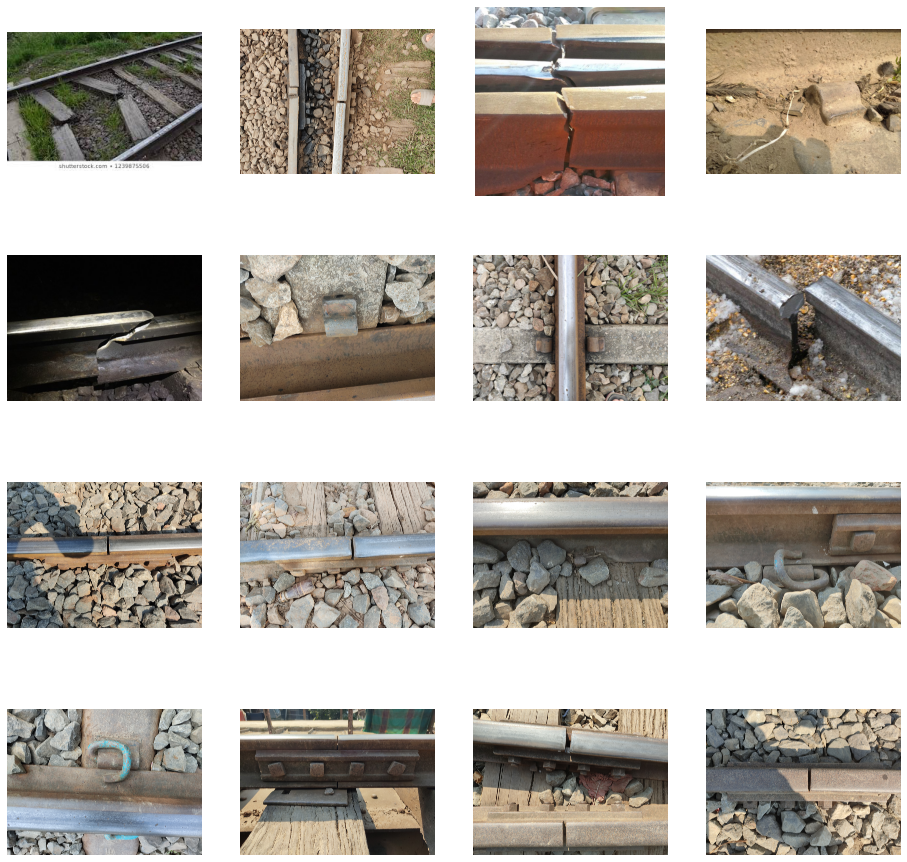

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
train_defective_fnames = os.listdir(defective_dir )
train_nondefective_fnames = os.listdir(nondefective_dir)
pic_index += 8
#Concatenate Components
next_defective_pix = [os.path.join( defective_dir, fname) 
                for fname in train_defective_fnames[pic_index-8:pic_index]]
next_nondefective_pix = [os.path.join(nondefective_dir, fname) 
                for fname in train_nondefective_fnames[pic_index-8:pic_index]]


# Compute index of the list over iteration
for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show() 

### Image Samples Of Each Category

In [13]:
image = cv2.imread('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Train/Defective/2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_faxepl (1).jpg')
type(image)

numpy.ndarray

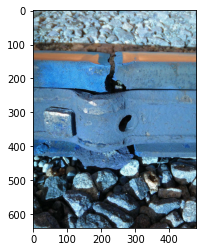

In [14]:
plt.imshow(image)

In [15]:
image = cv2.imread('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Train/Non defective/IMG_20201114_100021.jpg')
type(image)

numpy.ndarray

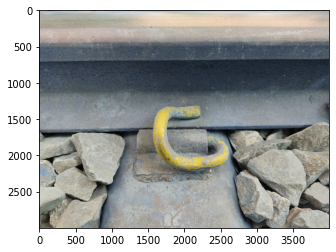

In [16]:
plt.imshow(image)

# **Model Training**

In [17]:
# Training Dataset

train_dataset=train.flow_from_directory('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Train',#use your directory location
                                       target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',#since we have only two classes to predict
                                       shuffle=True,#data gets shuffled before each epoch
                                       seed=42,# Since we need a predictable source of random numbers
                                       subset='training',           
                                       )

Found 285 images belonging to 2 classes.


In [18]:
#Validation Dataset

val_dataset=train.flow_from_directory('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Validation',#use your directory location
                                      target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',
                                       shuffle=True,
                                       seed=42,
                                       subset='validation',           
                                       )

Found 2 images belonging to 2 classes.


In [19]:
#Testing Dataset

test_dataset=train.flow_from_directory('../input/railway-track-fault-detection/Railway Track fault Detection Updated/Test',#use your directory location
                                      target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',
                                       shuffle=True,
                                       seed=42,           
                                       )

Found 22 images belonging to 2 classes.


In [20]:
#Classes Identification
class_names = train_dataset.class_indices
class_names

{'Defective': 0, 'Non defective': 1}

# **CNN Model**

**When a fall is detected, the system should present the significant information to railway station control, such as the time and location. The difference between a CNN and ordinary neural networks is that each neuron in a CNN is locally connected to only a few neurons in the previous layer; not to all neurons, as is the case in ordinary neural networks. This enables CNNs to be used to construct deeper networks and, consequently, learn more complex features.**

**Furthermore, CNNs have demonstrated high performance and are relatively easy to train. A basic CNN can be characterised as having two layers: a convolutional base layer that extracts features from an image and a classifier (a fully connected layer) to classify the image based on the detected features. Each frame undergoes a the data acquisition phase that supplies the system with the digitized data from such images.**


Fault Detection             
:-------------------------:
![](https://miro.medium.com/max/1400/0*B9eclvVEYYM8jpdN.png)   

**These data may include many events or statuses and can be acquired from both internal and external networks, such as traffic and/or track conditions and weather. Then, manipulation or data mining processes such as feature selection, extraction and standardisation can be applied to process the raw data for analysis. The data can contain many layers, including the acquisition time and location.**

**Next, an appropriate model and deep learning technique are used to perform feature detection and make predictions along with the actions and triggers to be activated when a threshold is breached. The goal is to create a proactive system that can avoid or mitigate unwanted events.**

Training
:-------------------------:
![](https://ascelibrary.org/cms/asset/851b5805-620d-4237-9187-83aa97060627/figure2.gif)

In [21]:
#Now making the CNN Model
#Feature extraction(2 Conv layers, 2 MaxPooling layers)

inputs = tf.keras.Input(shape=(img_height,img_width, 3))

#Adding the first layer to the CNN
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

#Adding the second layer tho the CNN
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

#Adding the final tho the CNN
x = tf.keras.layers.GlobalAveragePooling2D()(x) #to downsample the entire feature map into single value
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise 
#activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
#and bias is a bias vector created by the layer

In [22]:
#Model Create
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
#Compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [24]:
# print model summary
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33    

In [25]:
#Training the model to check it's accuracy
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True)
                             ])

Epoch 1/10
9/9 [==============================] - 106s 11s/step - loss: 0.6968 - accuracy: 0.4745 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 70s 8s/step - loss: 0.6974 - accuracy: 0.4471 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 69s 8s/step - loss: 0.7001 - accuracy: 0.4502 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 4/10
9/9 [==============================] - 69s 8s/step - loss: 0.6906 - accuracy: 0.5344 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 5/10
9/9 [==============================] - 68s 8s/step - loss: 0.6892 - accuracy: 0.6007 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 6/10
9/9 [==============================] - 69s 8s/step - loss: 0.6878 - accuracy: 0.5409 - val_loss: 0.6726 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 68s 7s/step - loss: 0.6855 - accuracy: 0.5488 - val_loss: 0.6648 - val_accuracy: 1.0000
Epoch 8/10
9/9 [================


# Statistical Overview

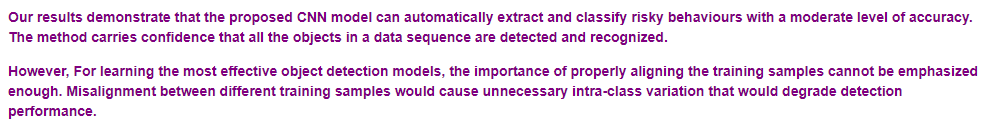

**Summarize History for Loss**

In [ ]:
fig = px.line(
    history.history,
    y=['accuracy', 'val_accuracy'],
    labels={'index': "Epoch", 'value': "Accuracy"},
    title="Accuracy of Training and Validation data wrt Time")
fig.show()

<img style="float: left;" src="acc.png"> 

**Summarize History for Accuracy**

In [ ]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Loss of Training and Validation data wrt Time")

fig.show()

<img style="float: left;" src="loss.png"> 

# **Final Results**

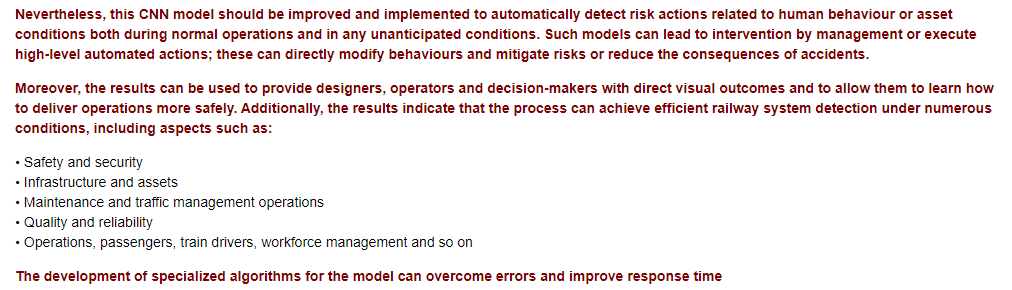



In [30]:
def evaluate_model(model, test_dataset):
    
    results = model.evaluate(test_dataset, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [31]:
evaluate_model(model, test_dataset)

    Test Loss: 0.66546
Test Accuracy: 54.55%


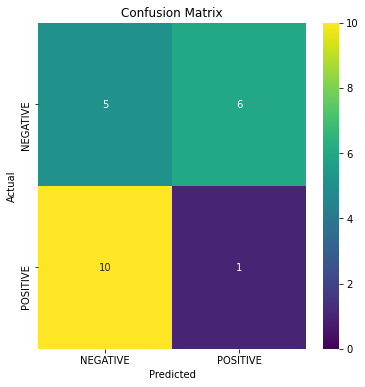

In [32]:
# predicted y values
y_pred = np.squeeze((model.predict(test_dataset) >= 0.5).astype(np.int))
cm = confusion_matrix(test_dataset.labels, y_pred)
clr = classification_report(test_dataset.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='viridis', cbar='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


We got 11749 correct predictions out of 12000 records in test set.

# **Classification Report**

In [33]:
#Classification Report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.33      0.45      0.38        11
    POSITIVE       0.14      0.09      0.11        11

    accuracy                           0.27        22
   macro avg       0.24      0.27      0.25        22
weighted avg       0.24      0.27      0.25        22



# Conclusion and Next Steps

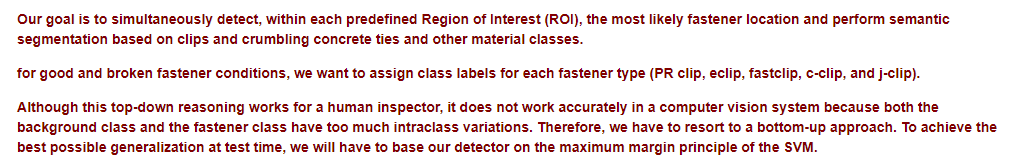